# METHOD Definening the noise model

### Generate a set of Rrs using Planarrad or Hydrolight

Populating the interactive namespace from numpy and matplotlib
'02/05/2015 03:57:31 PM' :: libbootstrappy :: INFO :: Reading :: /home/marrabld/Projects/phd/test_dataset/bootstrappy_test/batch_report.csv


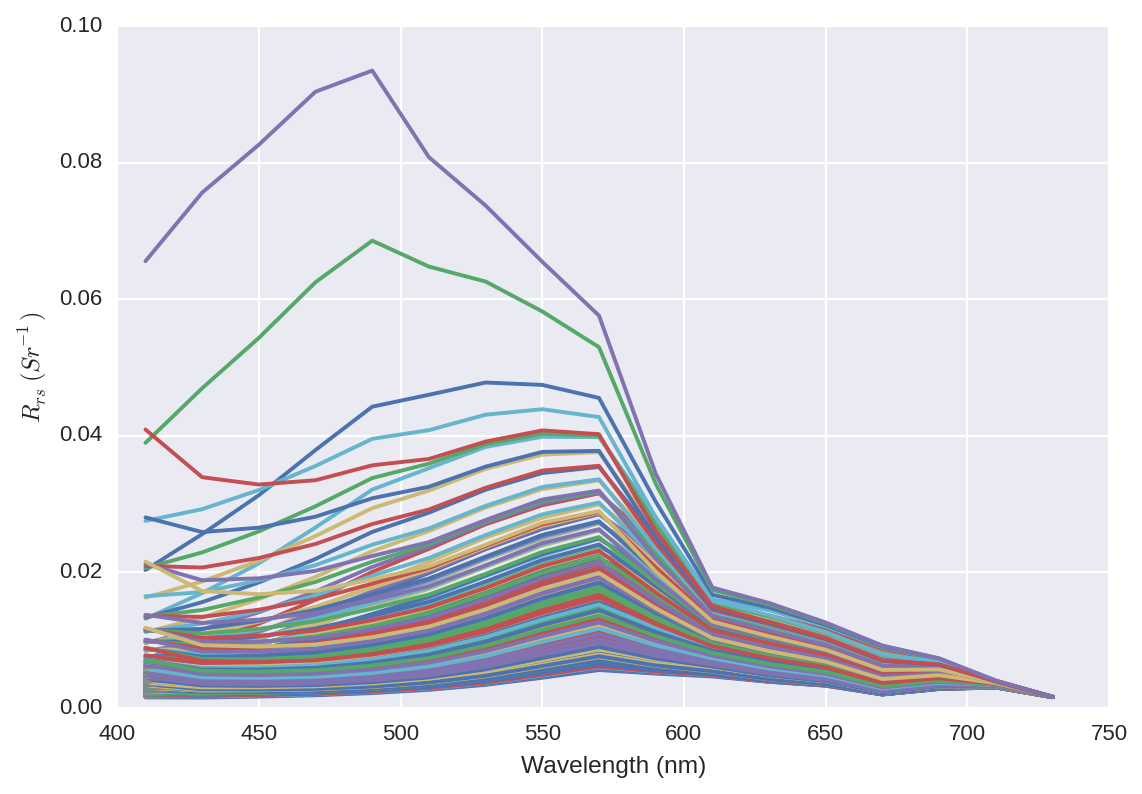

In [1]:
%pylab inline
matplotlib.rcParams['savefig.dpi'] = 160

import sys
import seaborn as sns
import numpy as np

sys.path.append('..')

import libbootstrap.spectralmodel as spectralmodel

test_data_file = '/home/marrabld/Projects/phd/test_dataset/bootstrappy_test/batch_report.csv'
sm = spectralmodel.BuildSpectralModel(test_data_file)

sns.axes_style("darkgrid")
    
for row in sm.Rrs:
    pylab.plot(sm.wave, row)
    
pylab.xlabel('Wavelength (nm)')
pylab.ylabel('$R_{rs}$ $(Sr^{-1})$')
pylab.show()

### Detrend $R_{rs}(\lambda)$ by subtracting the ensemble average

$\Delta_{rs}(\lambda) = R_{rs}(\lambda) - \left<R_{rs}(\lambda)\right>$

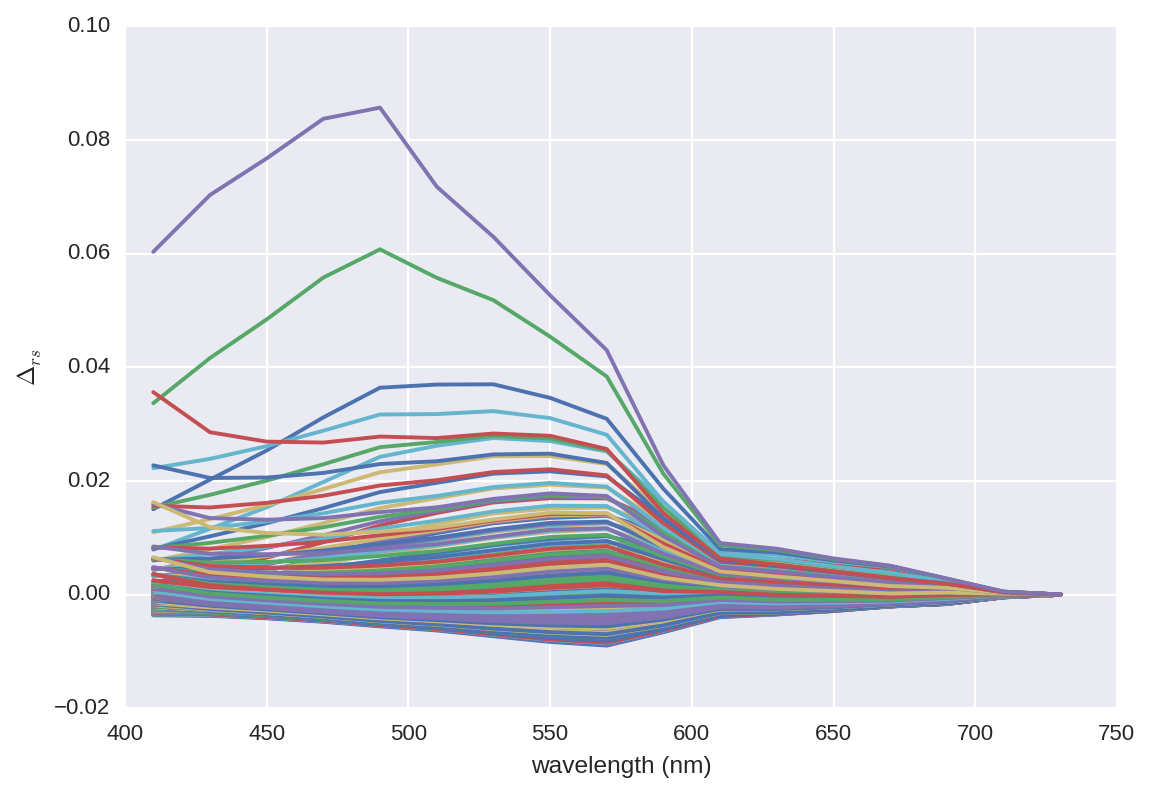

In [2]:
sm._detrend()

for row in sm.delta_Rrs:
    pylab.plot(sm.wave, row)

pylab.xlabel('wavelength (nm)')
pylab.ylabel('$\Delta_{rs}$')
pylab.show()

### Calc standard devation of $\Delta_{rs}(\lambda)$  .

$\sigma_{\Delta_{rs}(\lambda)}$

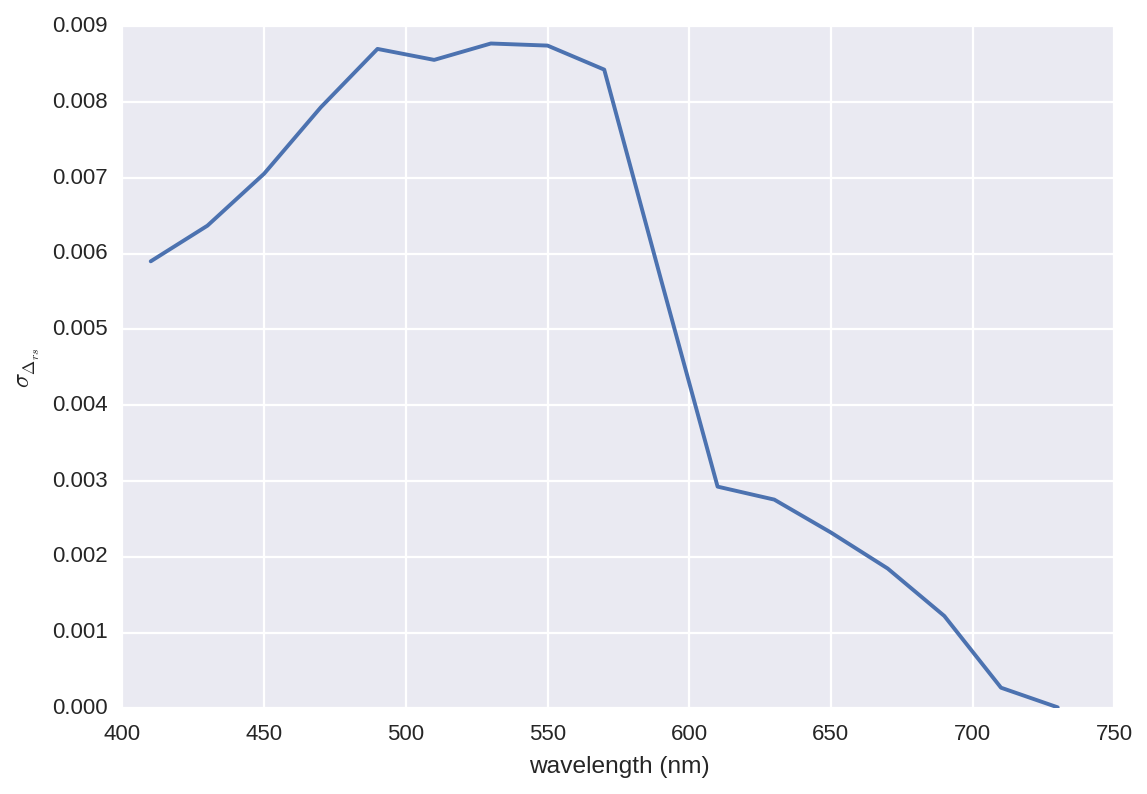

In [3]:
sm._calc_std_delta_Rrs()

pylab.plot(sm.wave, sm.std_delta_Rrs)

pylab.xlabel('wavelength (nm)')
pylab.ylabel('$\sigma_{\Delta_{rs}}$')

pylab.show()

### Calculate the normalised difference.  This step is to make sure the data is 'stationary'.

$\bar{\Delta}_{rs}(\lambda) = \frac{\Delta_{rs}(\lambda)}{\sigma_{\Delta_{rs}(\lambda)}}$
    

    

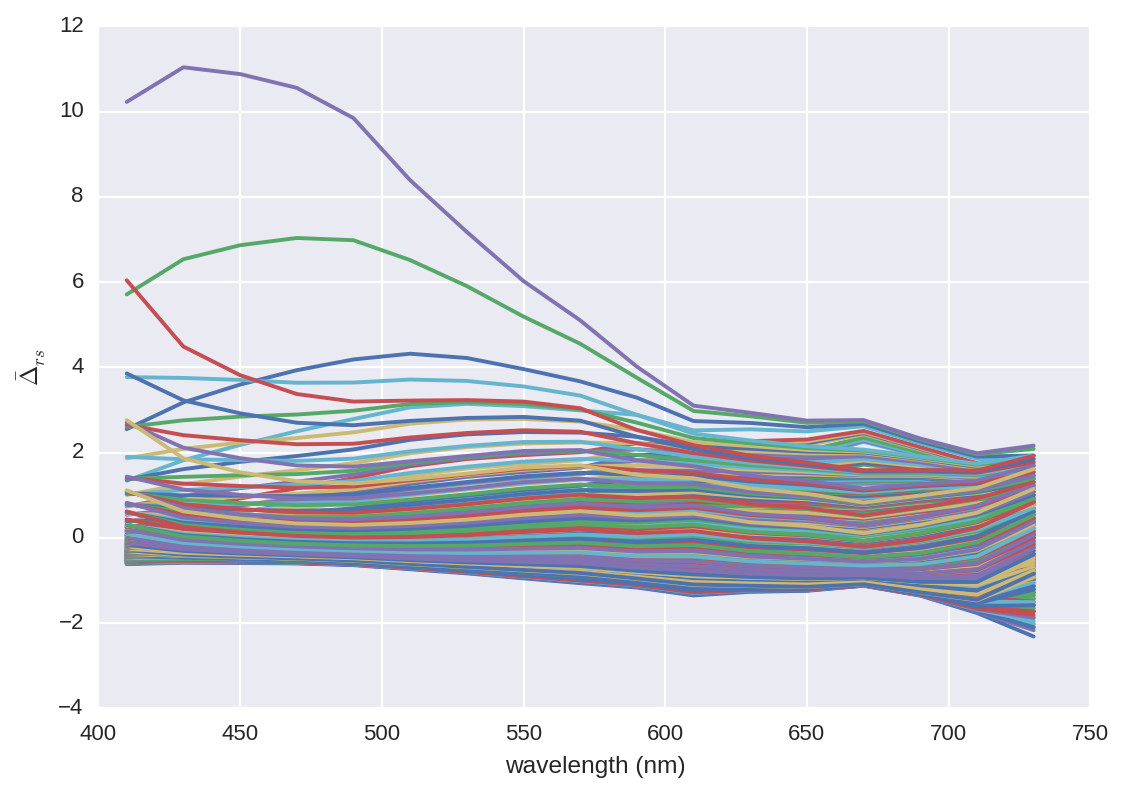

In [4]:
sm._calc_normalised_difference_Rrs()

for row in sm.delta_hat_Rrs:
    pylab.plot(sm.wave, row)
    
pylab.xlabel('wavelength (nm)')
pylab.ylabel(r'$\bar{\Delta}_{rs}$')

pylab.show()

### Check the distribution

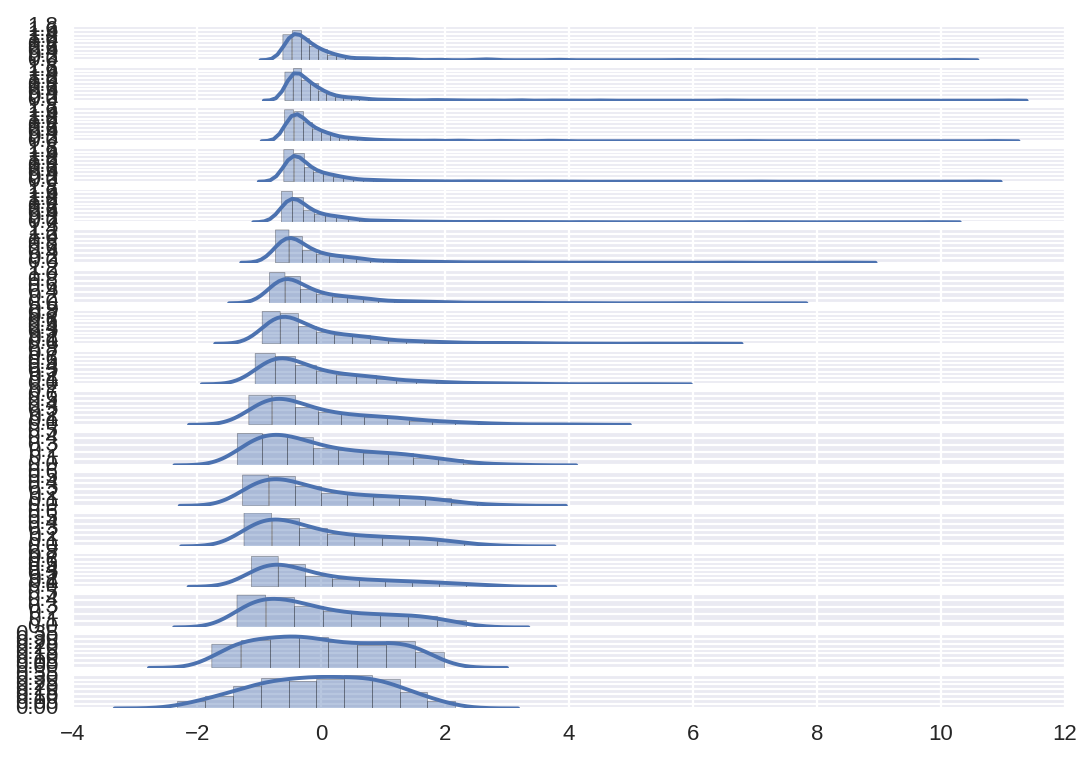

In [5]:
f, axarr = plt.subplots(17, sharex=True)

for i_iter in range(0,sm.delta_hat_Rrs.shape[1]):
    sns.distplot(sm.delta_hat_Rrs[:, i_iter], ax=axarr[i_iter])

### Calculate the powerspectrum


$Y = \mathcal{F}\{\bar{\Delta}_{rs}(\lambda)\}$

$S_{\lambda \lambda} = \left<YY^*\right>$


The power spectrum is the noise model in which realisation of $R_{rs}$ will be generated.

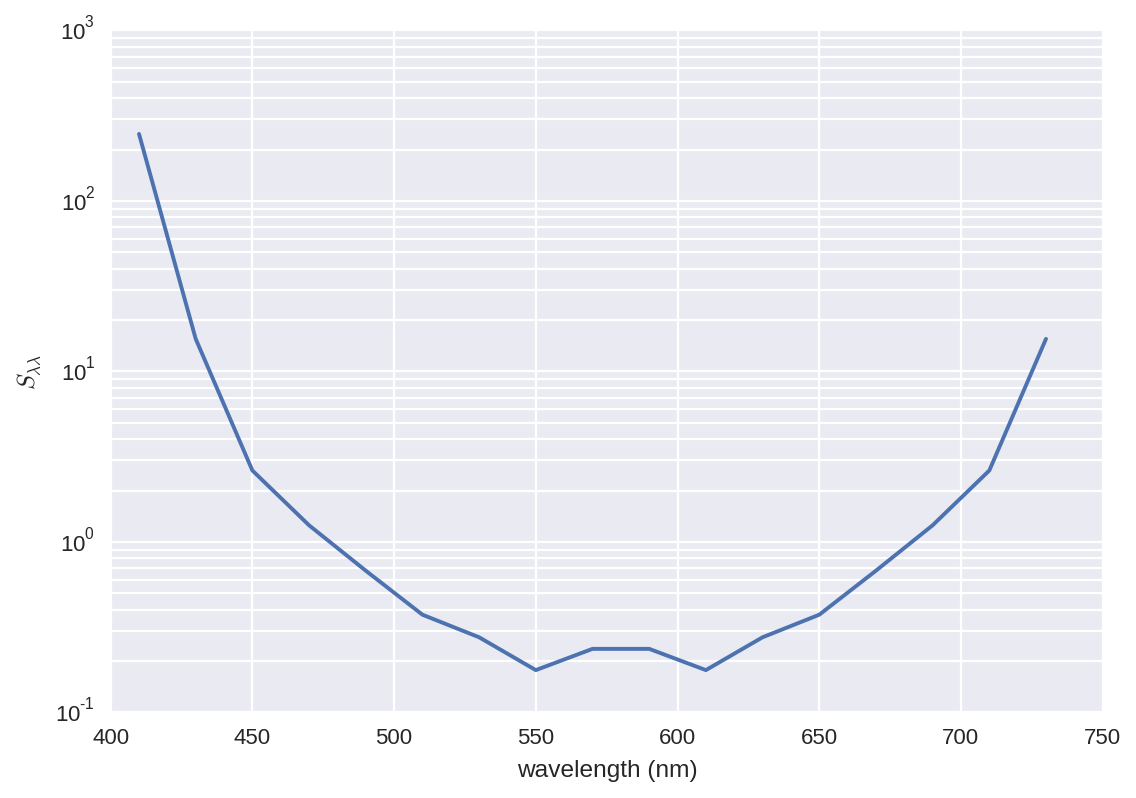

In [6]:
sm._calc_power_spectrum()

pylab.semilogy(sm.wave, np.real(sm.Syy))

pylab.xlabel('wavelength (nm)')
pylab.ylabel('$S_{\lambda \lambda}$')
pylab.show()

# METHOD Generating realisations

Generate random numbers $n$ between $0 \rightarrow 1$.  As first approximation, a guassian distribution can be used but the distribution that is used should comform to the distribtuion found in step 4 previous.

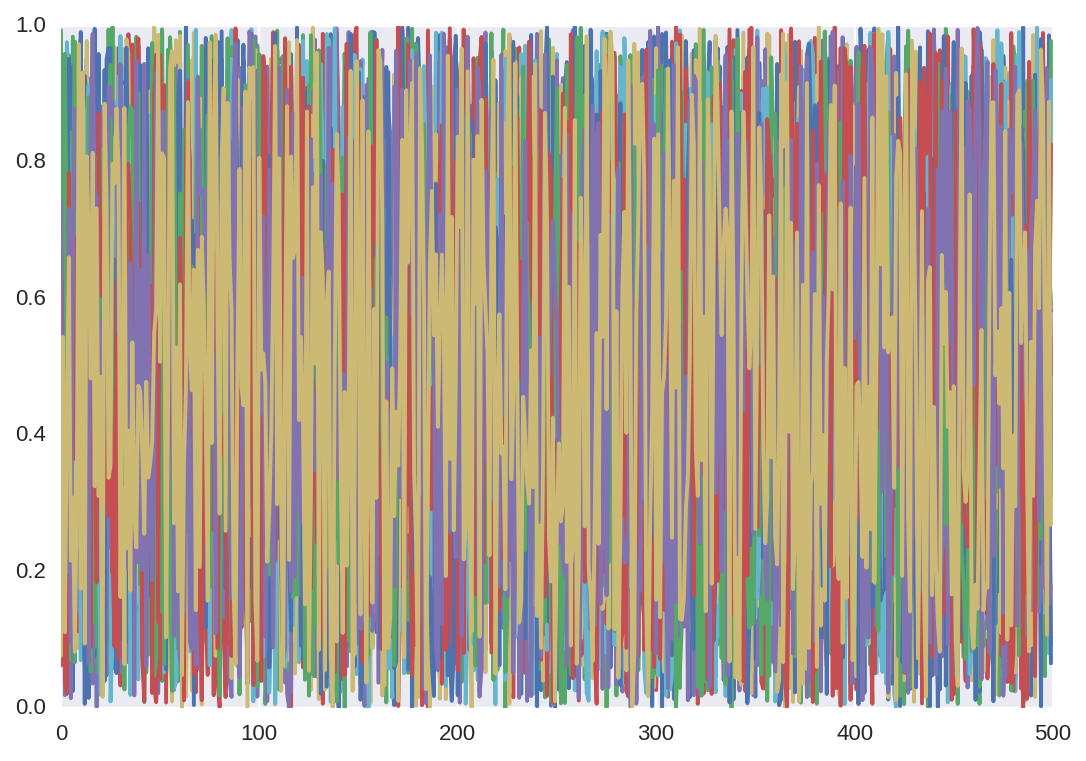

In [45]:
import libbootstrap.spectra_generator as spectra_generator

num_realizations = 500

sg = spectra_generator.GenerateRealisation(sm, num_realizations)
rn = sg._gen_random_numbers(num_realizations)

pylab.plot(rn)
pylab.show()


### Calculate the FFT of n

N = $\mathcal{F}\{n\}$

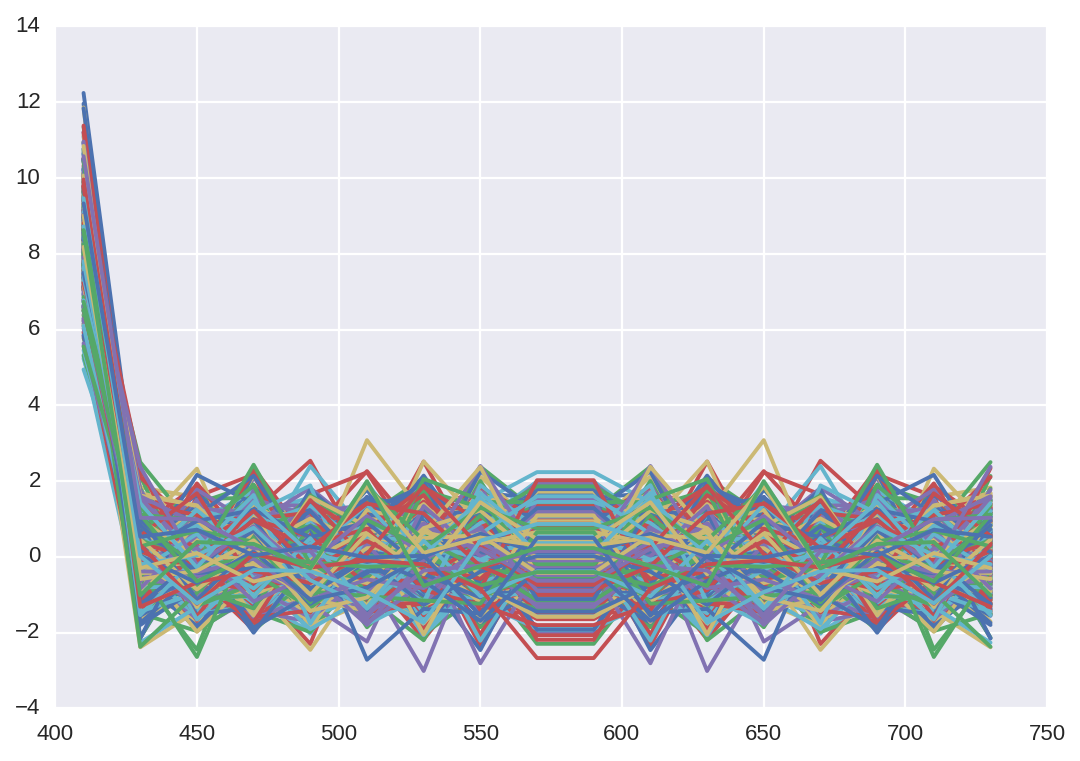

In [46]:
N = sg._calc_fft_random_numbers()

for row in N:
    pylab.plot(np.real(sm.wave), row)
pylab.show()

### Multiply the FFT of n by the squareroot of the powerspectrum

$Y = N \times \sqrt{S_{\lambda\lambda}}$

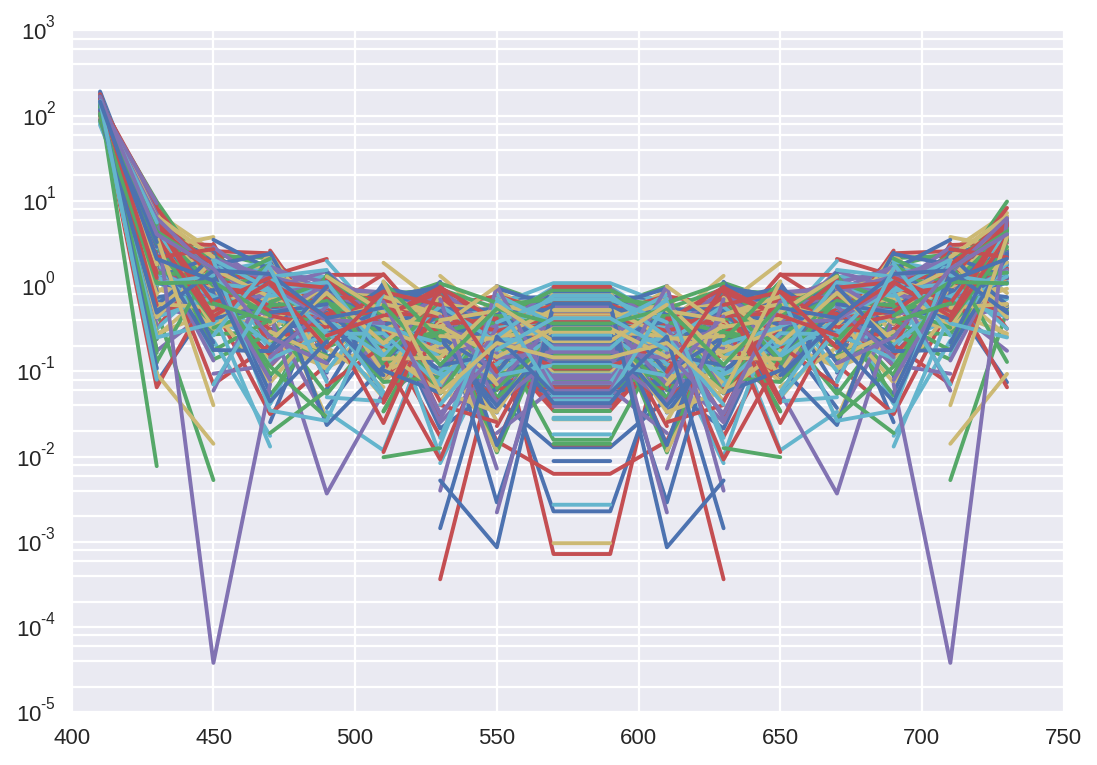

In [47]:
Y = sg._calc_rand_powerspectrum()

for row in Y:
    pylab.semilogy(sm.wave, row)
pylab.show()

$y(\lambda) = \mathcal{F}^{-1}\{Y\}$

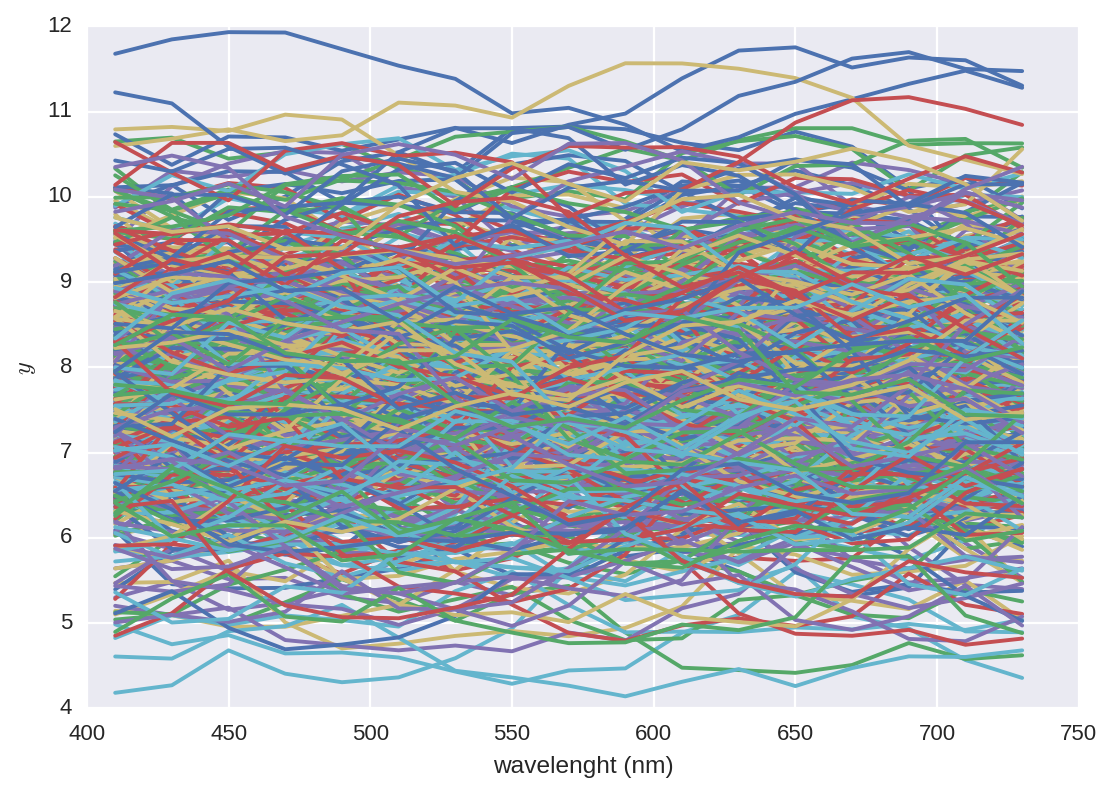

In [48]:
y = sg._calc_inv_rand_powerspectrum() # lowercase y

for row in y:
    pylab.plot(sm.wave, row)
    
pylab.xlabel('wavelenght (nm)')
pylab.ylabel(r'$y$')
pylab.show()

### Normalise the difference

$\bar{y}(\lambda) = \frac{y(\lambda)}{\sigma_y}$

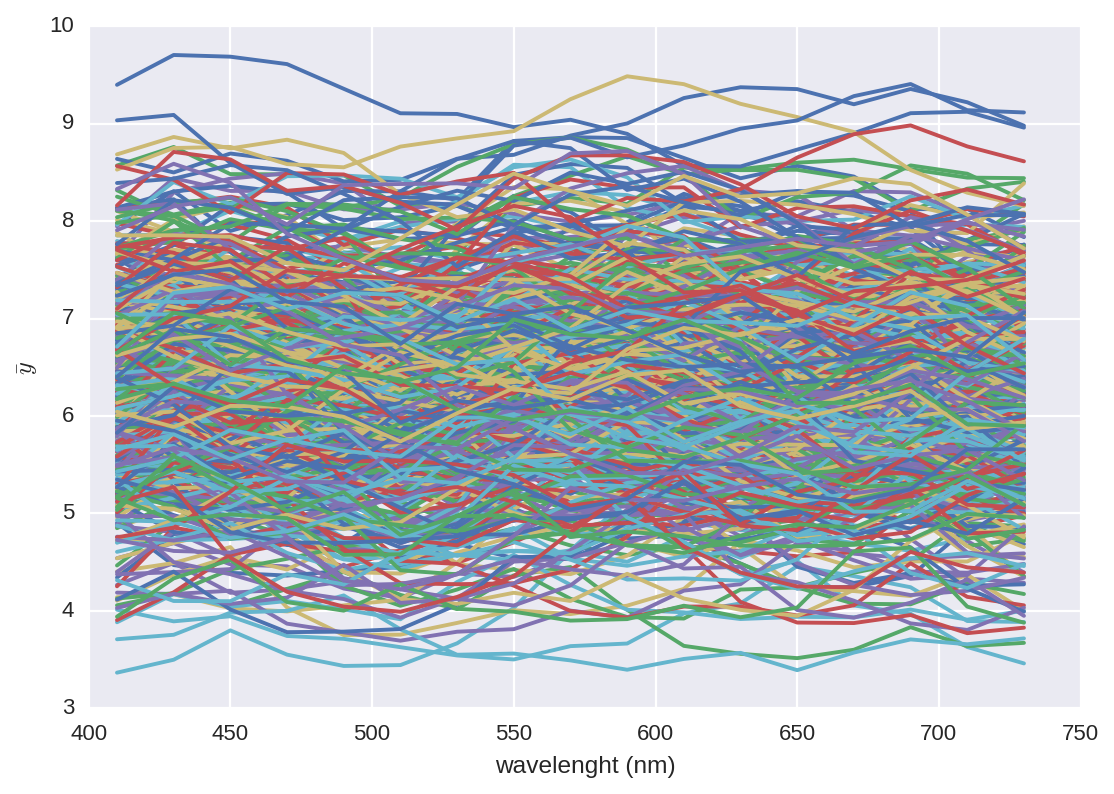

In [49]:
y_hat = sg._calc_normalised_difference_inv_rand_powerspectrum()

for row in y_hat:
    pylab.plot(sm.wave, row)
    
pylab.xlabel('wavelenght (nm)')
pylab.ylabel(r'$\bar{y}$')
pylab.show()

$z(\lambda) = \bar{y}(\lambda) \sigma_{\Delta_{rs}(\lambda)}$

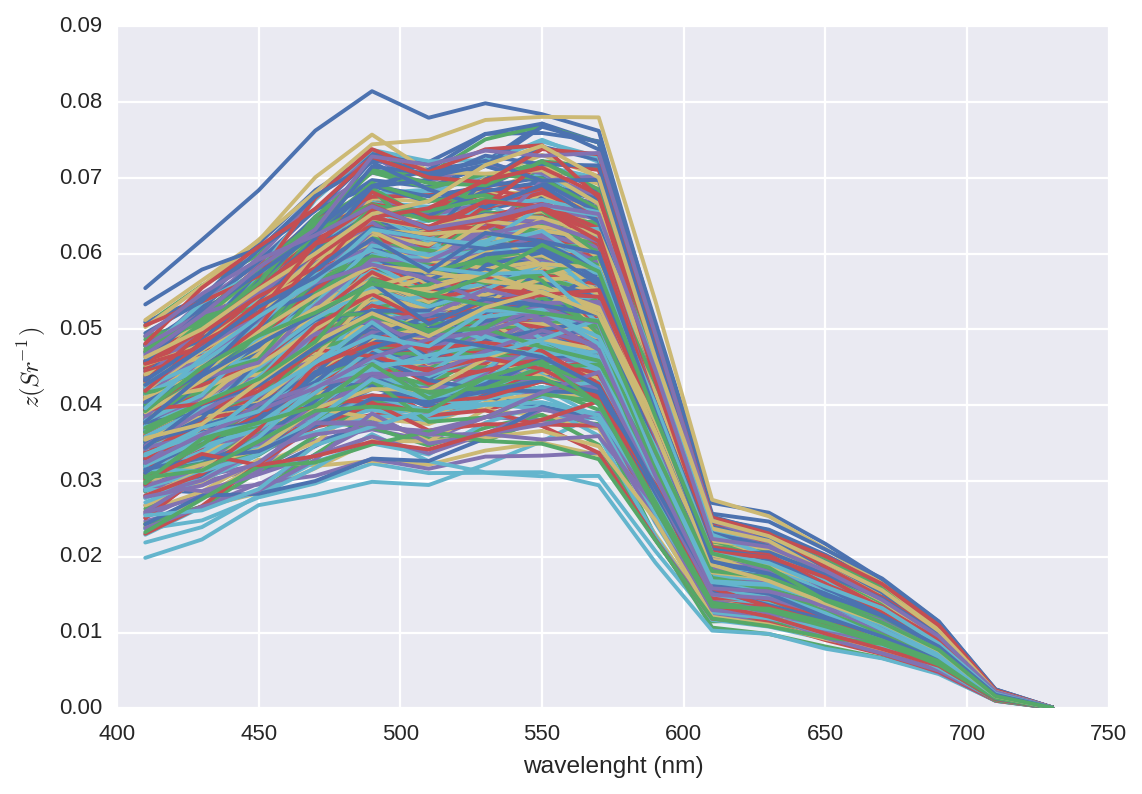

In [50]:
z = sg._calc_z()

for row in z:
    pylab.plot(sm.wave, row)
    
pylab.xlabel('wavelenght (nm)')
pylab.ylabel(r'$z (Sr^{-1})$')
pylab.show()


### Generate a realisation of $R_{rs}$ by adding back the mean value substracted in step 2 of defining the noise model

$\hat{R}_{rs}(\lambda) = \left<R_{rs}(\lambda)\right> + z(\lambda)$

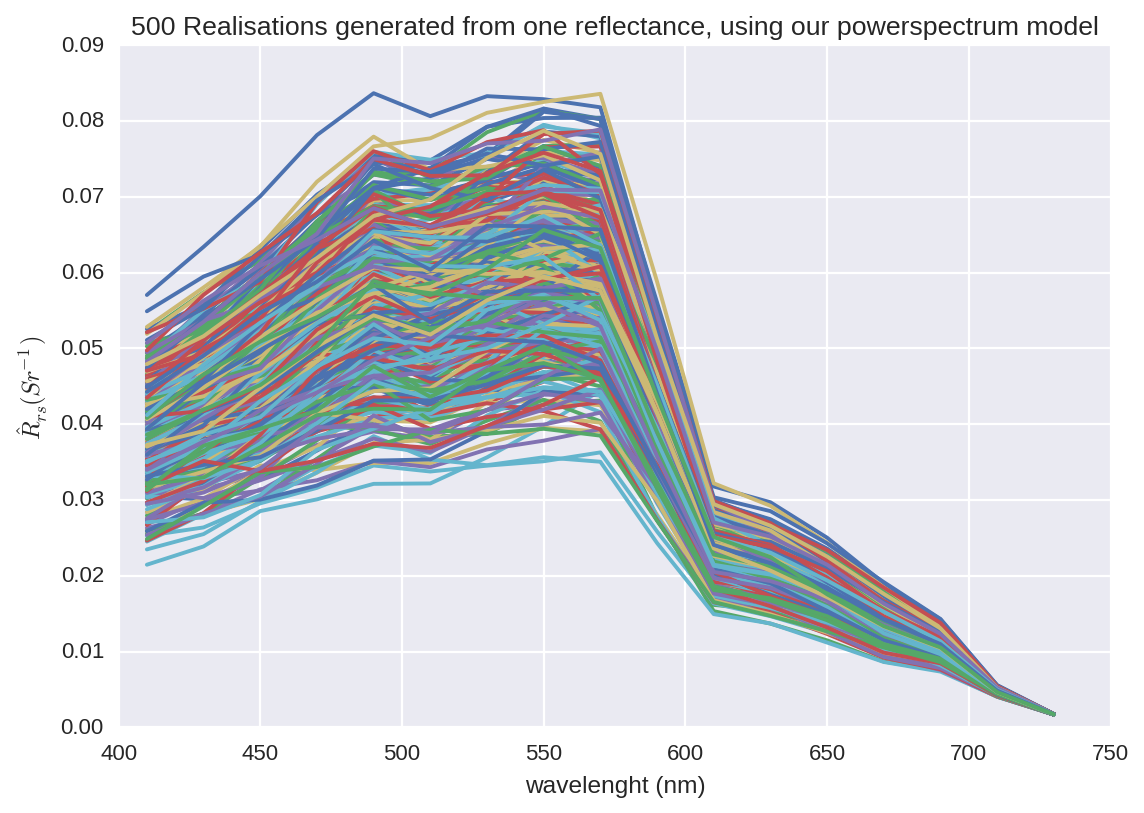

In [58]:
# pinch an Rrs from sm 
Rrs_1 = sm.Rrs[0, :]

# Generate 100 realisations from it.
Rrs = sg.gen_Rrs(Rrs_1)

for row in Rrs:
    pylab.plot(sm.wave, row)
    
pylab.title(str(num_realizations) + ' Realisations generated from one reflectance, using our powerspectrum model')
pylab.xlabel('wavelenght (nm)')
pylab.ylabel(r'$\hat{R}_{rs} (Sr^{-1})$')
pylab.show()